In [1]:
from periodic_orbits import is_periodic, is_equilibrium, stg_coordinate, get_periodic_domains
from ode_functions import theta_from_param,ic_function, fun, convert_to_dict, get_parameter_node, get_ic_domain, plot_projections, plot_time_series, plot_phase_projection
from ipynb.fs.full.ode_functions import *
from periodic_orbits2 import check_sequence
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.decomposition import PCA

In [2]:
#decay rates
decays = {'d_p' : 1, 'd_mc' : 1, 'd_mn' : 1}

#hill coefficient
n = 90

#ode solver parameters
t0 = 0
tf = 100

In [3]:
#Import parameters
Mback_all = pd.read_csv("Parameter_datasets/P1MBWback50Nodes.csv", header = None)#csv is 50 parameter sets, each as a row
mback_params = convert_to_dict_2(Mback_all)

In [3]:
# #Import parameters

# mback1 = pd.read_csv("Parameter_datasets/P1MBWbacknode1.csv", header = None)
# mbackparams1 = convert_to_dict(mback1)

# mback2 = pd.read_csv("Parameter_datasets/P1MBWbacknode2.csv", header = None)
# mbackparams2 = convert_to_dict(mback2)

# mback3 = pd.read_csv("Parameter_datasets/P1MBWbacknode3.csv", header = None)
# mbackparams3 = convert_to_dict(mback3)

# mback4 = pd.read_csv("Parameter_datasets/P1MBWbacknode4.csv", header = None)
# mbackparams4 = convert_to_dict(mback4)

# mback5 = pd.read_csv("Parameter_datasets/P1MBWbacknode5.csv", header = None)
# mbackparams5 = convert_to_dict(mback5)

# mback6 = pd.read_csv("Parameter_datasets/P1MBWbacknode6.csv", header = None)
# mbackparams6 = convert_to_dict(mback6)

# mback7 = pd.read_csv("Parameter_datasets/P1MBWbacknode7.csv", header = None)
# mbackparams7 = convert_to_dict(mback7)

# mback8 = pd.read_csv("Parameter_datasets/P1MBWbacknode8.csv", header = None)
# mbackparams8 = convert_to_dict(mback8)

# mback9 = pd.read_csv("Parameter_datasets/P1MBWbacknode9.csv", header = None)
# mbackparams9 = convert_to_dict(mback9)

# mback10 = pd.read_csv("Parameter_datasets/P1MBWbacknode10.csv", header = None)
# mbackparams10 = convert_to_dict(mback10)

# mback_params = [mbackparams1, mbackparams2, mbackparams3, mbackparams4, mbackparams5, mbackparams6, mbackparams7, mbackparams8, mbackparams9,
#              mbackparams10]

In [4]:
#generate 10 ICs in 111 region of parameter 1, 10 ICs in 002. 111 is potential splitting point.
#curious if ICs on big back orbit collapse into big front orbit or another orbit
#Note: "111" varies across parameters and takes on values in 110, midMR, midBR, 011, 010, 100 (all 6 bottom right, front bottom left)
#      "002" varies across parameters and takes on values in 001, 011, 012 (back top 4)
mback_ICs = []
random.seed(0)
for i in range(10):
    mback_ICs.append(ic_function("111", mback_params[0]))

In [9]:
%store mback_ICs

Stored 'mback_ICs' (list)


In [5]:
#compute orbit lengths for all parameter, initial condition combinations
mback_lengths = []#store orbit lengths, each set of 10 lengths corresponds to different ICs within same parameter
mback_sizes = []
for param in mback_params:
    theta = theta_from_param(param)
    for IC in mback_ICs:
        sol = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,n,decays), [0,tf], y0 = IC, method = 'BDF')
        output = get_periodic_domains(sol.y,theta,num_periods_to_verify = 2)
        mback_lengths.append(len(output))
        mback_sizes.append(upper_double_id(output))

/Users/Erika/Documents/Math/Research/periodic_orbits.py:96: UserWarning: get_periodic_domains looked at all time points but did not verify a periodic sequence to desired verification level of num_periods_to_verify = 2. The trajectory may not be periodic.
  warnings.warn('get_periodic_domains looked at all time points but did not verify a periodic sequence to desired verification level of num_periods_to_verify = {}. The trajectory may not be periodic.'.format(num_periods_to_verify))


In [10]:
%store mback_sizes

Stored 'mback_sizes' (list)


In [6]:
#observe orbit lengths (columns are different initial conditions)
npendpts = np.linspace(0,500,51)
endpts = []
for i in npendpts:
    endpts.append(int(i))
for i in range(len(endpts)-1):
    print('mback_param', i, ':', mback_lengths[endpts[i]:endpts[i+1]])

mback_param 0 : [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
mback_param 1 : [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
mback_param 2 : [8, 9, 72, 9, 10, 9, 80, 9, 9, 72]
mback_param 3 : [10, 10, 9, 10, 9, 9, 10, 9, 9, 9]
mback_param 4 : [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
mback_param 5 : [9, 10, 10, 108, 10, 10, 10, 10, 10, 10]
mback_param 6 : [10, 135, 10, 10, 9, 10, 10, 10, 10, 10]
mback_param 7 : [9, 100, 10, 10, 99, 9, 9, 9, 10, 10]
mback_param 8 : [9, 9, 9, 9, 9, 120, 10, 10, 10, 9]
mback_param 9 : [10, 10, 9, 9, 10, 9, 10, 10, 9, 10]
mback_param 10 : [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
mback_param 11 : [10, 9, 10, 10, 10, 9, 10, 10, 10, 10]
mback_param 12 : [10, 9, 10, 10, 10, 10, 10, 9, 9, 10]
mback_param 13 : [9, 9, 9, 9, 110, 9, 9, 110, 9, 9]
mback_param 14 : [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
mback_param 15 : [9, 10, 10, 9, 10, 10, 10, 10, 10, 10]
mback_param 16 : [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
mback_param 17 : [9, 9, 9, 10, 9, 9, 9, 9, 10, 9]
mback_param 18 : [7, 7, 7, 8, 7, 8, 8, 8, 8, 7]
mba

In [7]:
#observe orbit lengths (columns are different initial conditions)
for i in range(len(endpts)-1):
    print('mback_param', i, ':', mback_sizes[endpts[i]:endpts[i+1]])

mback_param 0 : ['Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small']
mback_param 1 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mback_param 2 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mback_param 3 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mback_param 4 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mback_param 5 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mback_param 6 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mback_param 7 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mback_param 8 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mback_param 9 : ['Large', 'Large', 'L

In [8]:
large, small = separate(mback_params, '111')

In [9]:
line_list = generate_all_lines(small, large, 50)

In [10]:
%%time
check_list(line_list)

CPU times: user 3min 48s, sys: 3.34 s, total: 3min 52s
Wall time: 4min 49s


[False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False]

Note: Time is only about 3 minutes for 10 parameters (16 total large/small combinations). Interesting, we get some Trues! Is this the result of 'shakey' orbits (probably) or of actual birythmicity (likely not)? Investigate these particular linear connections:

In [11]:
line = line_list[14]
sizes = []
#for the sake of easy ICs for first run
param = line[0]
sol = scipy.integrate.solve_ivp(fun, [0, tf], y0 = [param['thetaMnMc'], param['thetaPMn'], param['thetaMcP']], args = [param, n, decays], method = 'BDF')
#create sizes, list of lenghts in forward direction
for param in line:
    theta = theta_from_param(param)
    IC = [sol.y[0,-1],sol.y[1,-1],sol.y[2,-1]]
    sol = scipy.integrate.solve_ivp(fun, [0, tf], y0 = IC, args = [param, n, decays], method = 'BDF')
    if param == line[45]:
        sol1 = sol
    if param == line[46]:
        sol2 = sol
    if param == line[48]:
        sol3 = sol
#     if param == line[47]:
#         sol4 = sol
    output = get_periodic_domains(sol.y,theta,num_periods_to_verify = 2)
    size = upper_double_id(output)
    sizes.append(size)

In [12]:
rev_line = line.copy()
rev_line.reverse()
rev_sizes = []
#for the sake of easy ICs for first run
param = rev_line[0]
sol = scipy.integrate.solve_ivp(fun, [0, tf], y0 = [param['thetaMnMc'], param['thetaPMn'], param['thetaMcP']], args = [param, n, decays], method = 'BDF')
for param in rev_line:
    theta = theta_from_param(param)
    rev_IC = [sol.y[0,-1],sol.y[1,-1],sol.y[2,-1]]
    sol = scipy.integrate.solve_ivp(fun, [0, tf], y0 = rev_IC, args = [param, n, decays], method = 'BDF')
    if param == line[45]:
        sol1b = sol
    if param == line[46]:
        sol2b = sol
    if param == line[48]:
        sol3b = sol
#     if param == line[47]:
#         sol4b = sol
    output = get_periodic_domains(sol.y,theta,num_periods_to_verify = 2)
    size = upper_double_id(output)
    rev_sizes.append(size)
rev_rev_sizes = rev_sizes.copy()
rev_rev_sizes.reverse()

In [13]:
output1 = get_periodic_domains(sol3.y, theta_from_param(line[48]), num_periods_to_verify = 2)
output2 = get_periodic_domains(sol3b.y, theta_from_param(line[48]), num_periods_to_verify = 2)

In [14]:
upper_double_id(output1)

'Large'

In [15]:
upper_double_id(output2)

'Small'

In [16]:
for i in range(len(sizes)):
    print(i, sizes[i], rev_rev_sizes[i])

0 Large Large
1 Large Large
2 Large Large
3 Large Large
4 Large Large
5 Large Large
6 Large Large
7 Large Large
8 Large Large
9 Large Large
10 Large Large
11 Large Large
12 Large Large
13 Large Large
14 Large Large
15 Large Large
16 Large Large
17 Large Large
18 Large Large
19 Large Large
20 Large Large
21 Large Large
22 Large Large
23 Large Large
24 Large Large
25 Large Large
26 Large Large
27 Large Large
28 Large Large
29 Large Large
30 Large Large
31 Large Large
32 Large Large
33 Large Large
34 Large Large
35 Large Large
36 Large Large
37 Large Large
38 Large Large
39 Large Large
40 Large Large
41 Large Large
42 Large Large
43 Large Large
44 Large Large
45 Small Large
46 Large Small
47 Small Small
48 Large Small
49 Small Small


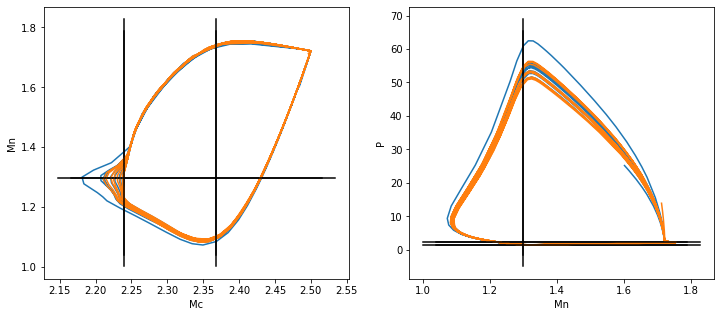

In [17]:
#plotting framework
# param = mback_params[0]
# sol0 = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,n,decays), [0,tf], y0 = mback_ICs[0], method = 'BDF')
# sol1 = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,n,decays), [0,tf], y0 = mback_ICs[1], method = 'BDF')
param = line[48]
fig,(ax1,ax2) = plot_projections(sol3, param)
plot_projections(sol3b, param, axs = (ax1, ax2))
# ax1.set_xlim(1,2.75)
# # ax1.set_ylim(0.3,0.8)
# ax2.set_xlim(0.6,1)
# ax2.set_ylim(0,8.5)

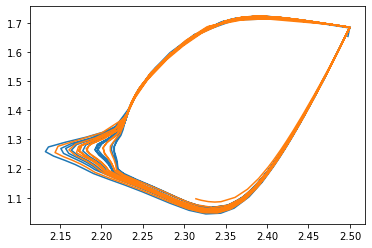

In [18]:
plt.plot(sol2.y[0],sol2.y[1])
plt.plot(sol2b.y[0],sol2b.y[1])

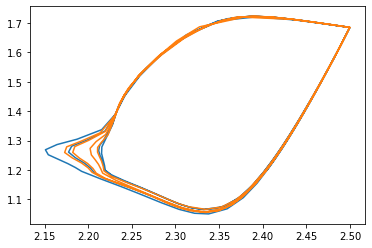

In [25]:
plt.plot(sol2.y[0][450:],sol2.y[1][450:])
plt.plot(sol2b.y[0][450:],sol2b.y[1][450:])

(<Figure size 1152x288 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1acf2810>,
       dtype=object))

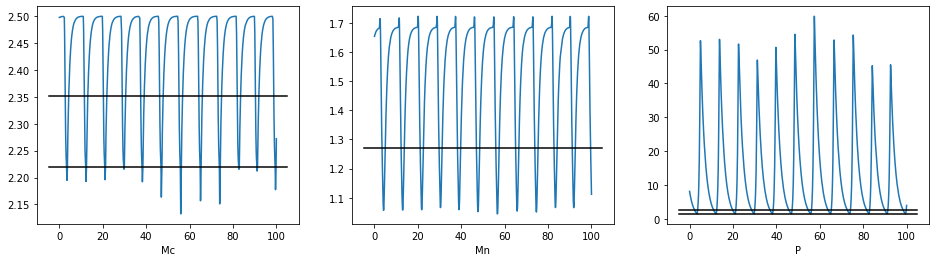

In [28]:
param = line[46]
plot_time_series(sol2,param)

### PCA Stuff

In [20]:
#0 is small, 1 is large
mback_param_colors = [1, 1, 0, 1, 0, 1, 1, 1, 1, 1]

mbackdf1 = pd.DataFrame.from_dict(mbackparams1, orient = 'index')
mbackdf1 = mbackdf1.T
mbackdf2 = pd.DataFrame.from_dict(mbackparams2, orient = 'index')
mbackdf2 = mbackdf2.T
mbackdf3 = pd.DataFrame.from_dict(mbackparams3, orient = 'index')
mbackdf3 = mbackdf3.T
mbackdf4 = pd.DataFrame.from_dict(mbackparams4, orient = 'index')
mbackdf4 = mbackdf4.T
mbackdf5 = pd.DataFrame.from_dict(mbackparams5, orient = 'index')
mbackdf5 = mbackdf5.T
mbackdf6 = pd.DataFrame.from_dict(mbackparams6, orient = 'index')
mbackdf6 = mbackdf6.T
mbackdf7 = pd.DataFrame.from_dict(mbackparams7, orient = 'index')
mbackdf7 = mbackdf7.T
mbackdf8 = pd.DataFrame.from_dict(mbackparams8, orient = 'index')
mbackdf8 = mbackdf8.T
mbackdf9 = pd.DataFrame.from_dict(mbackparams9, orient = 'index')
mbackdf9 = mbackdf9.T
mbackdf10 = pd.DataFrame.from_dict(mbackparams10, orient = 'index')
mbackdf10 = mbackdf10.T

mback_param_data = pd.concat([mbackdf1,mbackdf2,mbackdf3,mbackdf4,mbackdf5,mbackdf6,mbackdf7,mbackdf8,mbackdf9,mbackdf10])

mback_param_data['OrbitLength'] = mback_param_colors

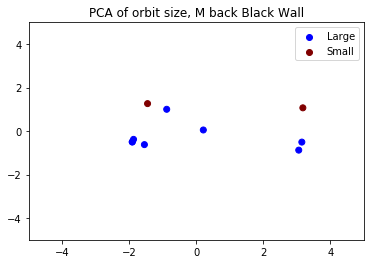

In [21]:
pca = PCA(n_components = 2)
pca.fit(mback_param_data.iloc[:,0:17])
mback_pca = pca.transform(mback_param_data.iloc[:,0:17])

labels = mback_param_data.loc[:,'OrbitLength']
label_colors = {0:'maroon',1:'blue'}
cvec = [label_colors[label] for label in labels]
plt.scatter(mback_pca[:,0],mback_pca[:,1], c = cvec)
plt.scatter(25,25,c = 'blue',label = 'Large')#point at (25,25) just for labeling purposes
plt.scatter(25,25,c = 'maroon', label = 'Small')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title('PCA of orbit size, M back Black Wall')
plt.legend(loc = 'best')
# plt.savefig('pca_all_attributes.png')
plt.show()
plt.close()